Put the data excel file in the same directory of the code

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [2]:
if not os.path.exists('output_figures'):
    os.mkdir('output_figures')

In [4]:
data = pd.read_excel('Dataset_muSORS.xlsx', sheet_name='Fig.3c-f, Extended Data Fig.6-8')
data = data.to_numpy()

In [5]:
subject = data[2:, 0]
sampling_point = data[2:, 1]
VPG = data[2:, 2]
y_true_1 = data[2:, 3]
y_pred_1 = data[2:, 4]
y_true_2 = data[2:, 5]
y_pred_2 = data[2:, 6]
subject_number = np.array([int(x[1:]) if not pd.isnull(x) else np.nan for x in subject])
subject_type = np.array([x[0] if not pd.isnull(x) else np.nan for x in subject])

In [6]:
sns.set_theme()
sns.set_style('white')
sns.set_style('ticks')

In [7]:
vmin = np.nanmin(VPG)
vmax = np.nanmax(VPG)

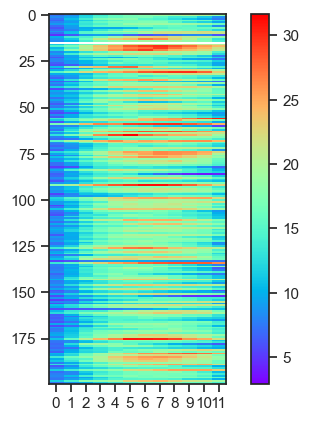

In [8]:
VPG_d_array = np.nan*np.zeros((200, 12))
for i in range(200):
    for j in range(12):
        VPG_val = VPG[(subject_number == i+1) & (sampling_point == j+1) & (subject_type == 'D')]
        if len(VPG_val) == 1:
            VPG_d_array[i,j] = VPG_val
plt.imshow(VPG_d_array, aspect=1/8, cmap='rainbow', interpolation='none', vmin=vmin, vmax=vmax)
plt.xticks(np.arange(12))
plt.colorbar()
plt.savefig('output_figures/VPG_d.pdf')

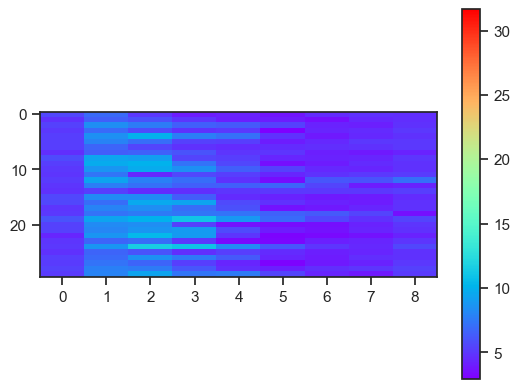

In [9]:
VPG_n_array = np.nan*np.zeros((30, 9))
for i in range(30):
    for j in range(9):
        VPG_val = VPG[(subject_number == i+1) & (sampling_point == j+1) & (subject_type == 'N')]
        if len(VPG_val) == 1:
            VPG_n_array[i,j] = VPG_val
plt.imshow(VPG_n_array, aspect=1/8, cmap='rainbow', interpolation='none', vmin=vmin, vmax=vmax)
plt.xticks(np.arange(9))
plt.colorbar()
plt.savefig('output_figures/VPG_n.pdf')